# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler , Normalizer
from scipy import stats
from sklearn import metrics
from pathlib import Path
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

In [4]:
import matplotlib as mpl
import seaborn as sns
sns.set(style="whitegrid")
import plotly.graph_objects as ply
import plotly.express as px
from sklearn.datasets import load_digits
%config InlineBackend.figure_format = 'retina'

## Data Pre-Processing

In [5]:
# Read csv file Cardio 
df = pd.read_csv("cardio.csv")

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.shape

(70000, 13)

In [8]:
# Statistic description for numeric columns
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Standard deviations show all the variables contain some information.

In [9]:
list(df)

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [10]:
# Check null values
display("NULL Values", df.isnull().sum())

'NULL Values'

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### No null values.

## Exploratory data analysis (EDA)

In [55]:
# Cardio 
df = pd.read_csv("cardio.csv")

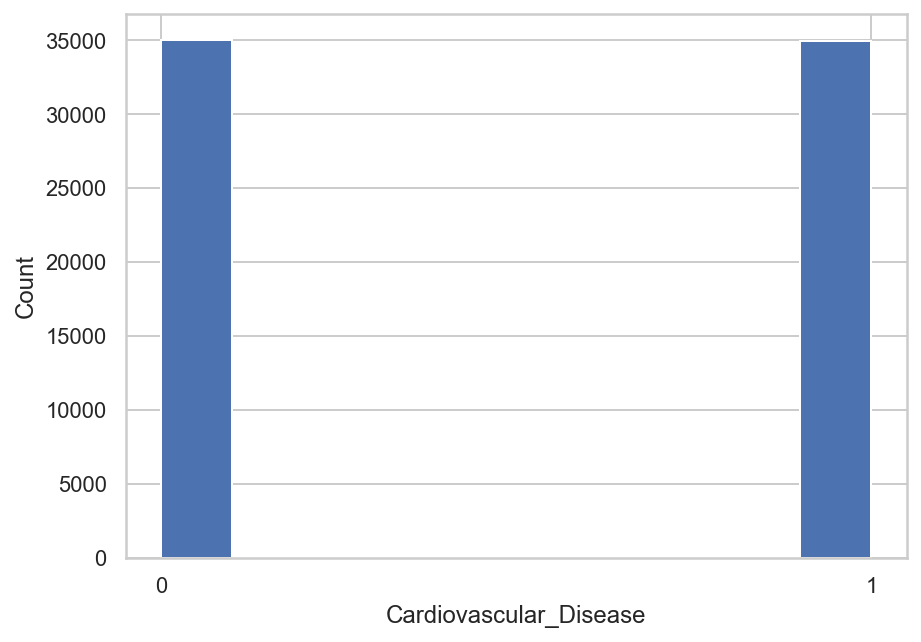

In [69]:
#Cardiovascular_Disease  histogram
plt.figure(figsize=(7,5))
plt.hist(df['cardio'])
plt.xlabel('Cardiovascular_Disease')
plt.ylabel('Count')
plt.xticks([0,1])
plt.show()

### Age Distribution

Text(0.5, 1.0, 'Distribution of Ages')

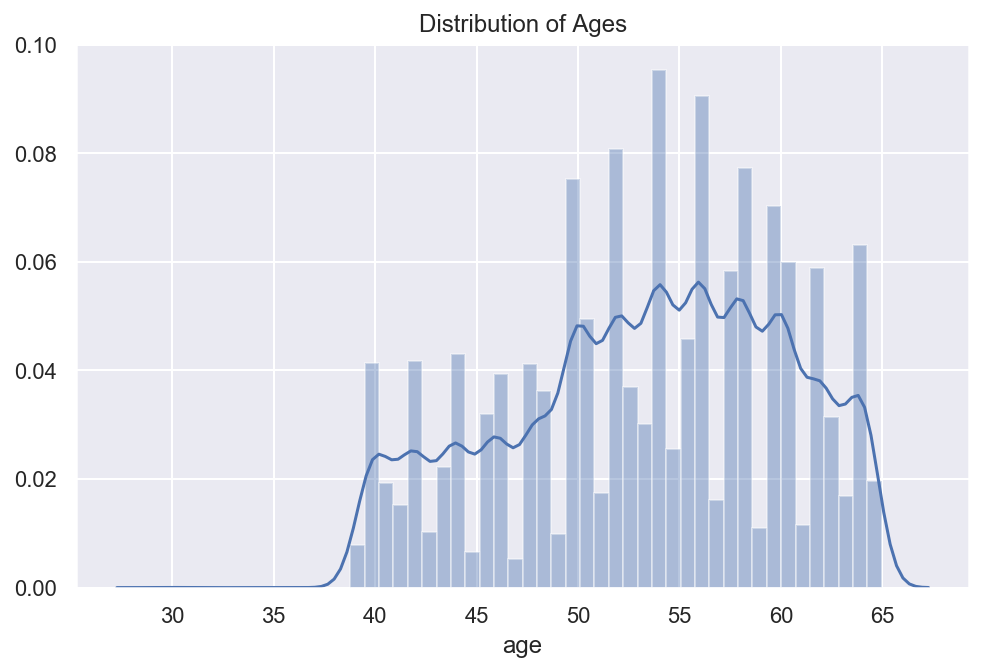

In [153]:
# Distribution of age, with an overlay of a density plot
sns.set(rc={'figure.figsize':(8,5)})
age_dist = sns.distplot(df['age'])
age_dist.set_title("Distribution of Ages")

In [206]:
# Cardiovascular Disease across age
# mpl.rcParams['figure.figsize'] = 10,8
# sns.countplot(x="age", hue="cardio", data = df).set_title("Appearance of Cardiovascular Disease (CVD) Across Ages")
# plt.savefig("Card_Across_Ages.png")

### Height Distribution

Text(0.5, 1.0, 'Distribution of Height')

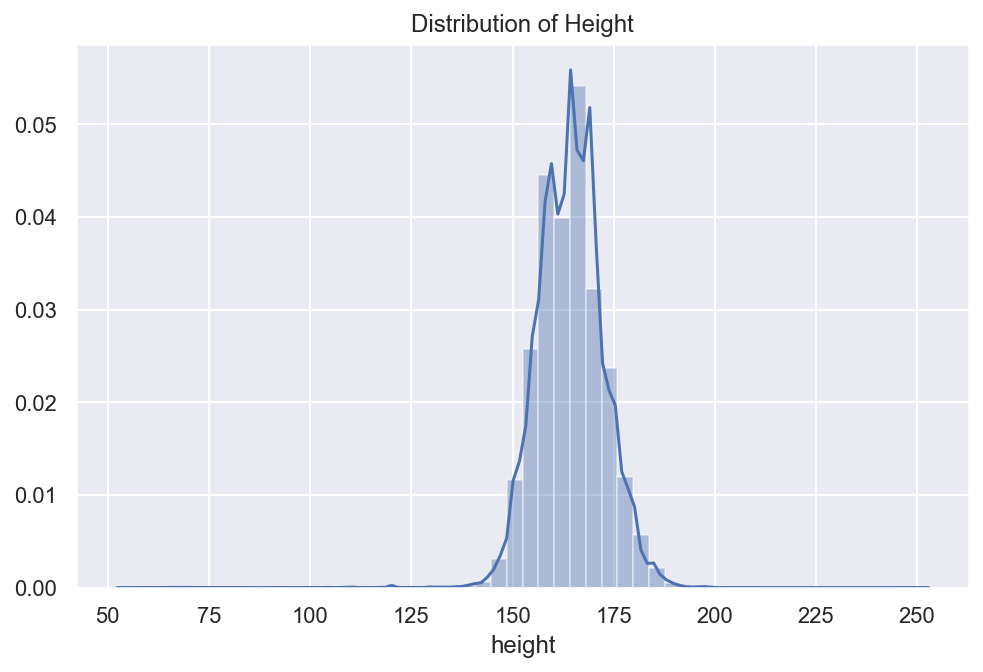

In [154]:
# Distribution of height, with an overlay of a density plot
sns.set(rc={'figure.figsize':(8,5)})
age_dist = sns.distplot(df['height'])
age_dist.set_title("Distribution of Height")

### Weight Distribution

Text(0.5, 1.0, 'Distribution of Weight')

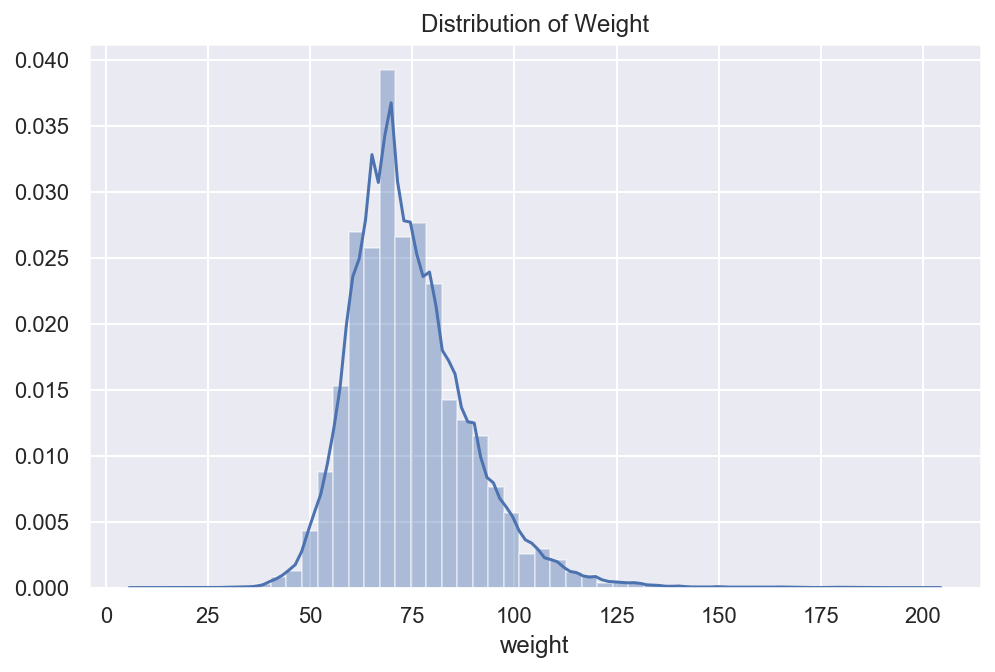

In [156]:
# Distribution of weitht, with an overlay of a density plot
sns.set(rc={'figure.figsize':(8,5)})
age_dist = sns.distplot(df['weight'])
age_dist.set_title("Distribution of Weight")

### Gender and Cardiovascular Disease

In [70]:
# Cardiovascular_Disease by gender
df.groupby('gender')['gender'].count()

gender
1    45530
2    24470
Name: gender, dtype: int64

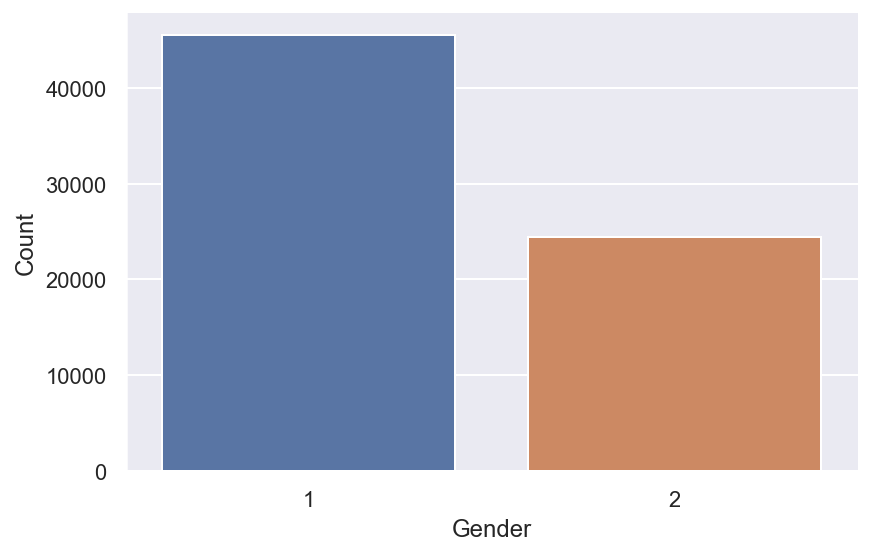

In [139]:
# Use seaborn to plot males and females count: male=1, female=2
fig = sns.catplot('gender', data=df, height=4,kind='count',aspect=1.5)
fig.set_axis_labels("Gender","Count")

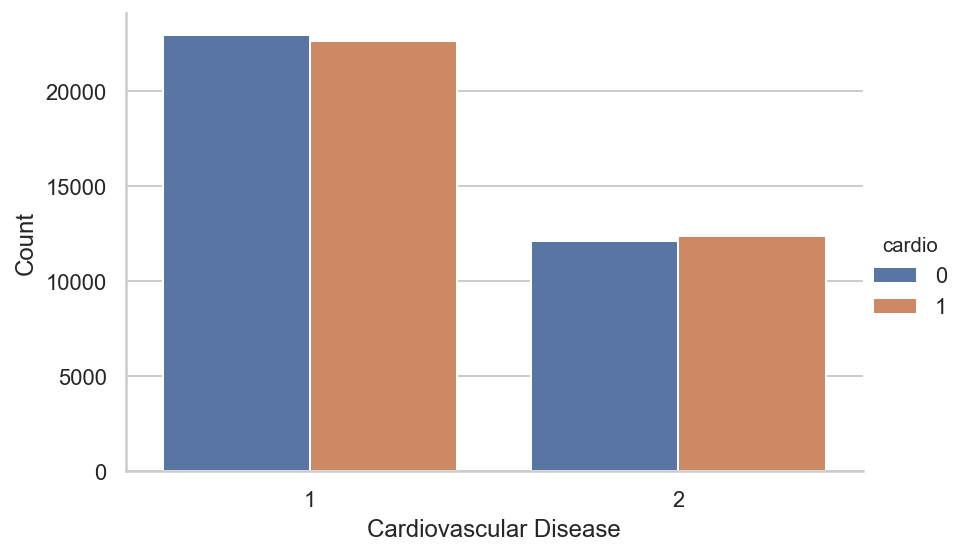

In [192]:
# Use seaborn to plot males and females Cardiovascular_Disease
fig = sns.catplot('gender', data=df, hue='cardio',height=4,kind='count',aspect=1.5)
fig.set_axis_labels("Cardiovascular Disease","Count")

###  Cholesterol Cardiovascular Disease

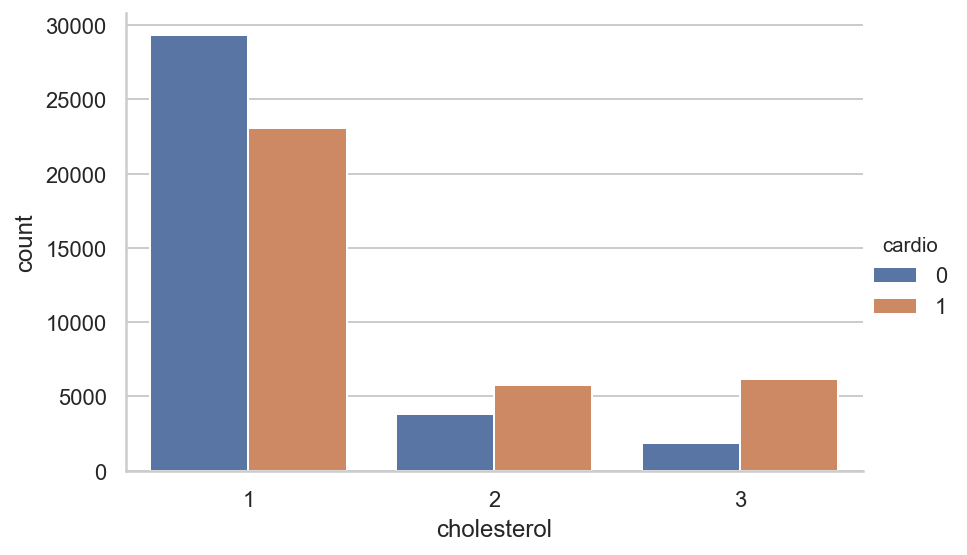

In [195]:
fig = sns.catplot('cholesterol', data=df, hue='cardio',height=4,kind='count',aspect=1.5)
fig.savefig("Cholesterol_Cardiovascular_Disease.png")

### Gluc and Cardiovascular Disease

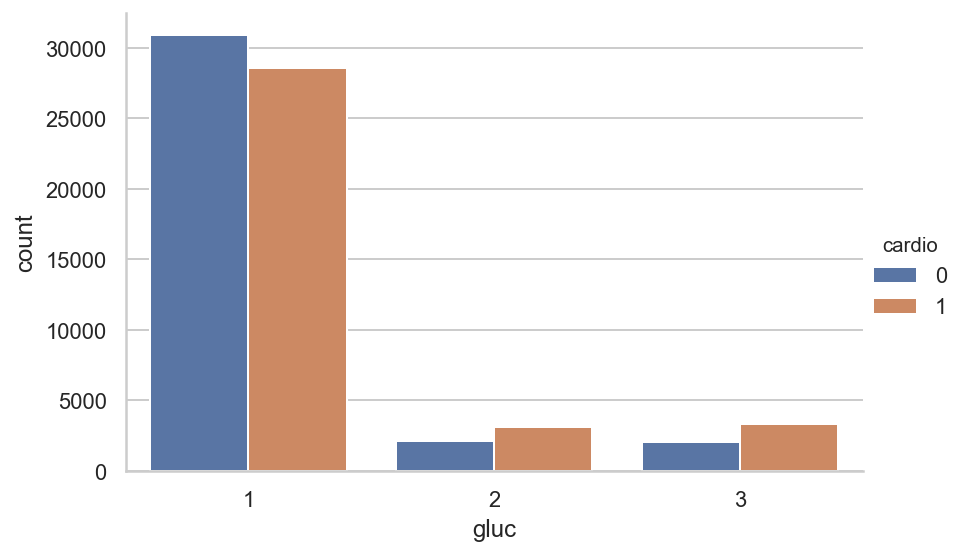

In [193]:
fig = sns.catplot('gluc', data=df, hue='cardio',height=4,kind='count',aspect=1.5)

### Smoke and Cardiovascular Disease

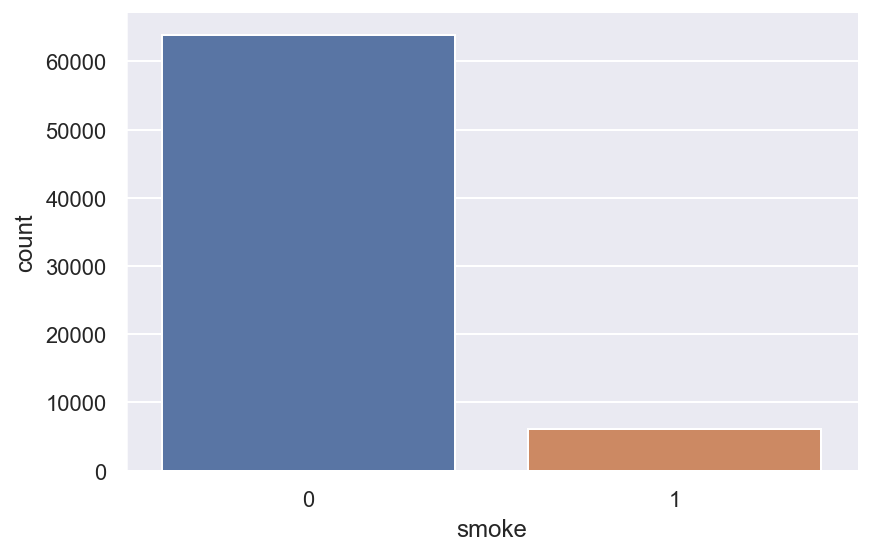

In [146]:
# Use seaborn to plot smoke or not count: smoke=1, not smoke=0
sns.catplot('smoke', data=df,kind='count', height=4, aspect=1.5)

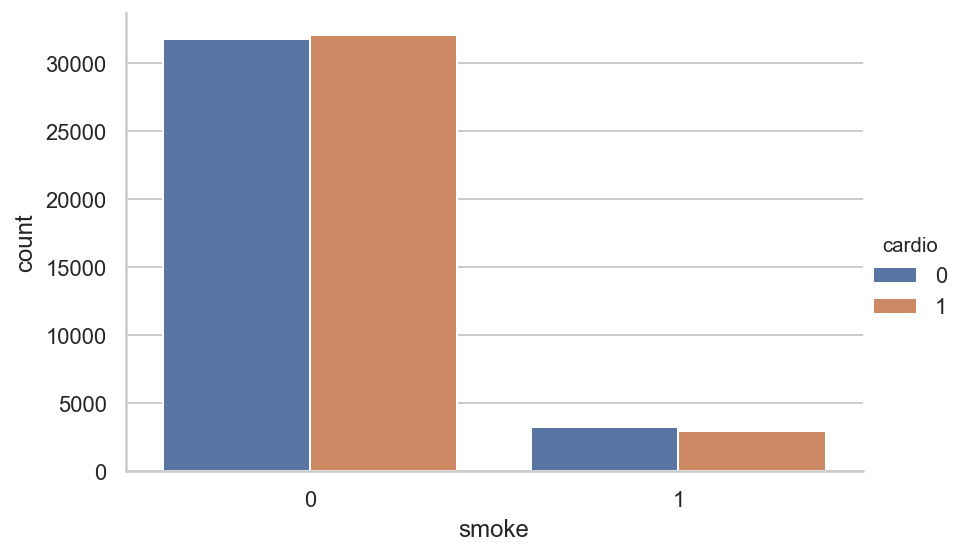

In [194]:
# Use seaborn to plot smoke and cardio
sns.catplot('smoke', data=df,hue='cardio', kind='count', height=4, aspect=1.5)

### Alchohol and Cardiovascular Disease

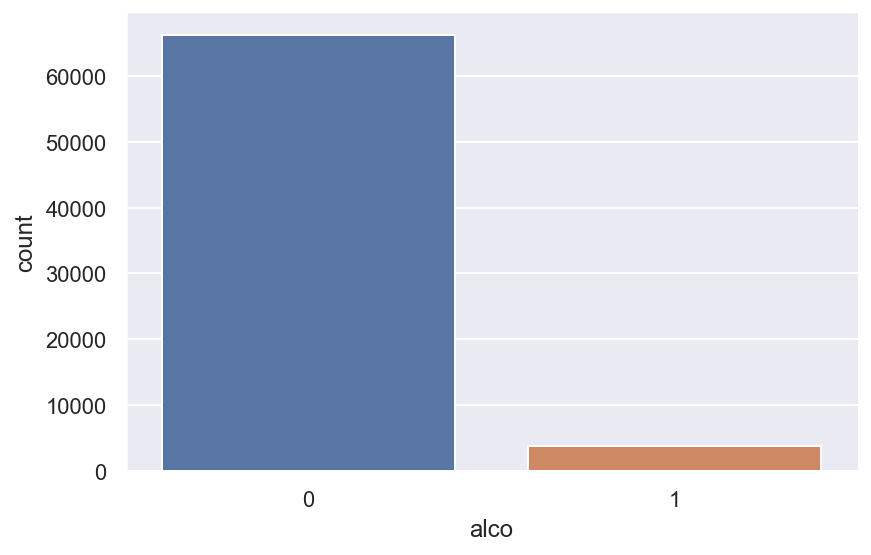

In [150]:
# Use seaborn to plot smoke or not count: smoke=1, not smoke=0
sns.catplot('alco', data=df,kind='count', height=4, aspect=1.5)

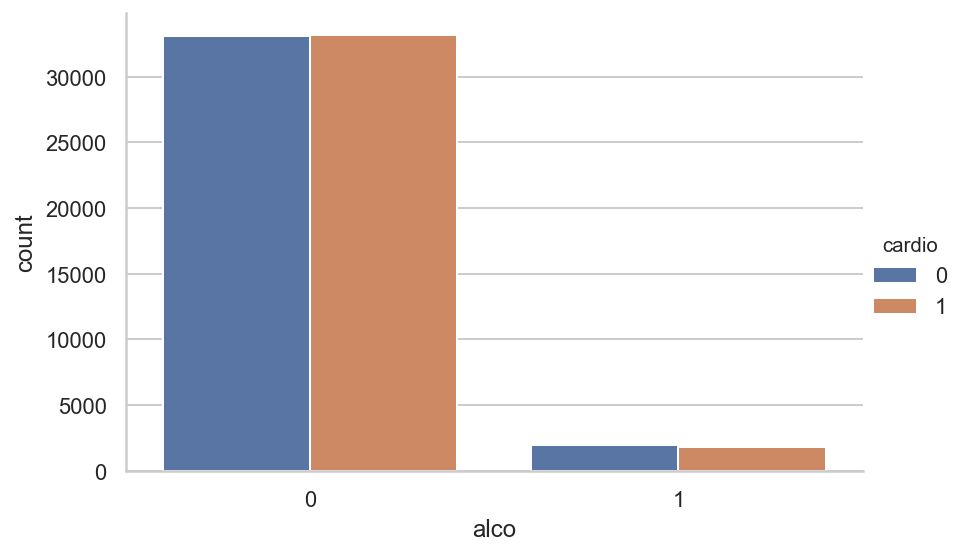

In [196]:
# Use seaborn to plot alchohol and cardio
sns.catplot('alco', data=df,hue='cardio', kind='count', height=4, aspect=1.5)

### Active or Not and Cardiovascular Disease

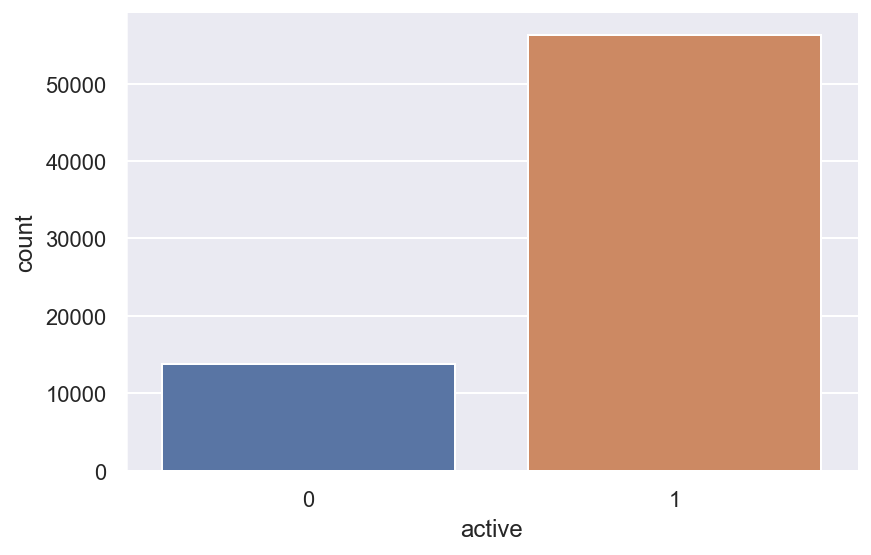

In [151]:
# Use seaborn to plot smoke or not count: active=1, not active=0
sns.catplot('active', data=df,kind='count', height=4, aspect=1.5)

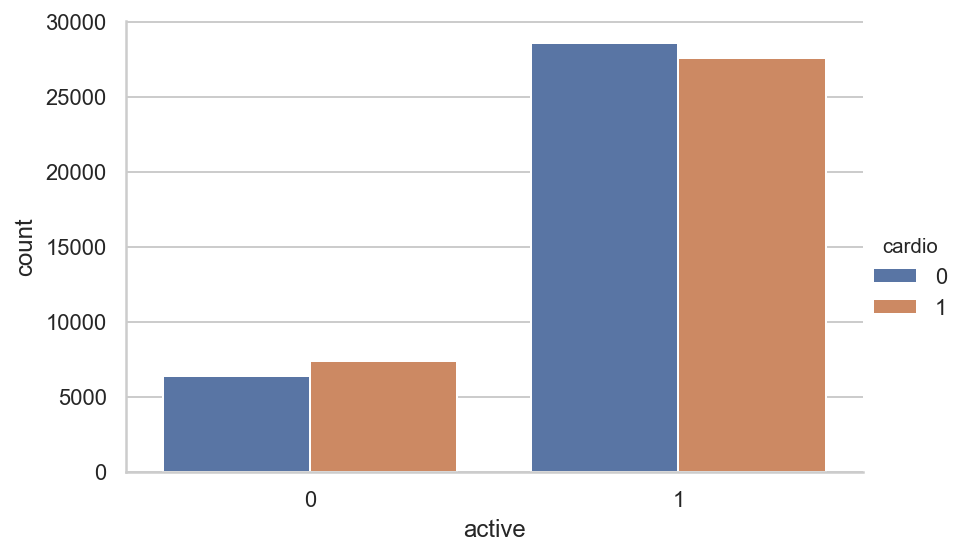

In [197]:
# Use seaborn to plot active and cardio
sns.catplot('active', data=df,hue='cardio', kind='count', height=4, aspect=1.5)

# Feature Selection

In [11]:
# Drop id column
df= df.drop("id",axis=1)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [12]:
# Generate correlation matrix
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


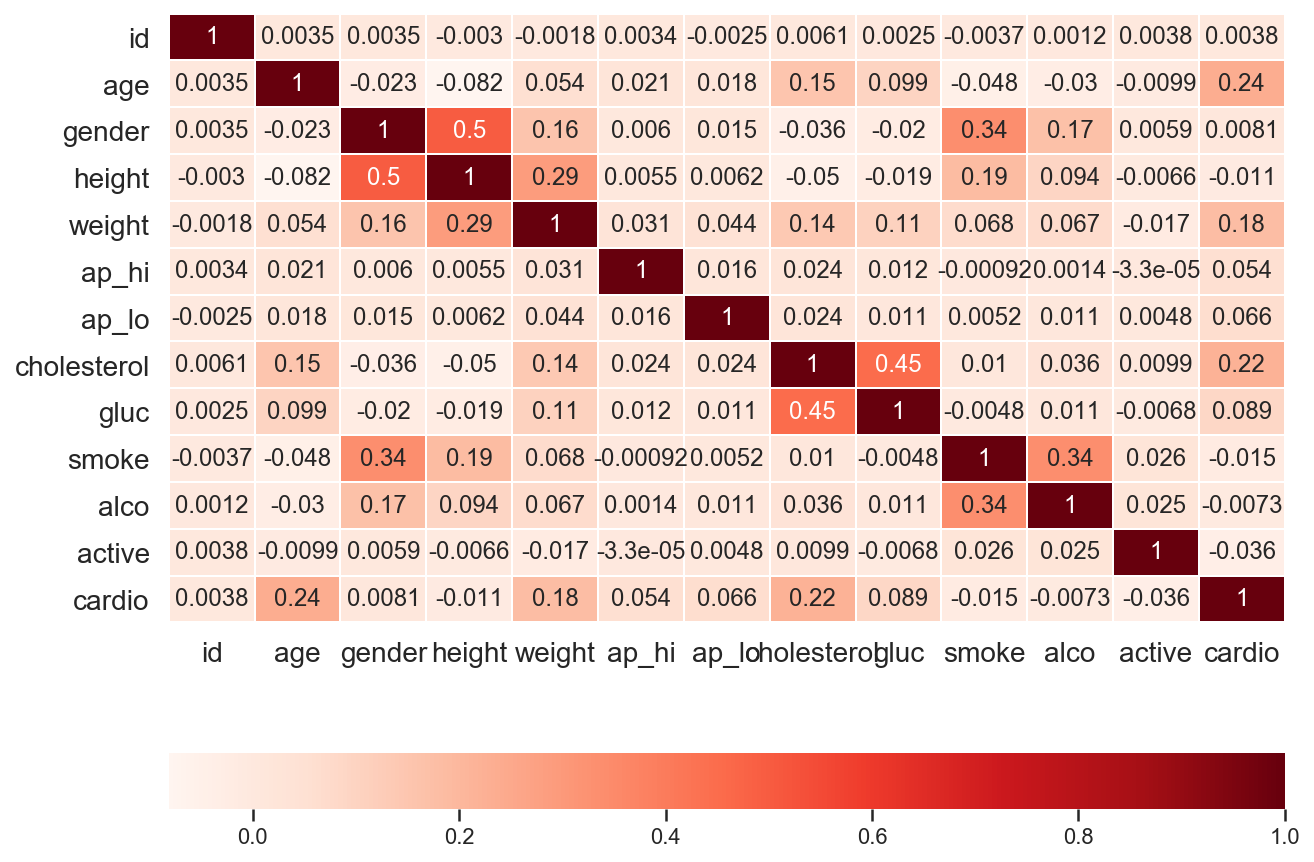

In [157]:
# Plot correlation matrix
mpl.rcParams["figure.figsize"] = 10, 8
res = sns.heatmap(df.corr(), annot = True, linewidth=.5, cmap="Reds",annot_kws={"size":12}, cbar_kws={"orientation": "horizontal"})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
plt.savefig("Corr_Matrix_Heat_Map.png")

In [13]:
# Generate covariance matrix
# df.cov()

## Feature Engineering

### Use recursive feature elimination to help select features.

In [14]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [15]:
from sklearn.feature_selection import RFE

In [16]:
# Generate X and y variables
y = df[["cardio"]]
X = df.drop(["cardio"],axis=1)

In [17]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.391781,2,168,62.0,110,80,1,1,0,0,1
1,55.419178,1,156,85.0,140,90,3,1,0,0,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0
3,48.282192,2,169,82.0,150,100,1,1,0,0,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0


In [18]:
# Create the RFE using random forest
rf = RandomForestClassifier()

In [19]:
rf

RandomForestClassifier()

In [20]:
rfe = RFE(estimator=rf,step=1)
selector = rfe.fit(X, y)

C:\Users\kylie\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\kylie\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\kylie\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\kylie\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

In [23]:
# Variables chosen by feature engineering
selector.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [24]:
# Variable importance ranking
selector.ranking_

array([1, 4, 1, 1, 1, 1, 2, 3, 6, 7, 5])

## Selected Features: age, height, weight, ap_hi, ap_lo, cholesterol

In [25]:
# Report selected features by feature engineering
print("Optimal number of features : %d" % rfe.n_features_)

Optimal number of features : 5


In [26]:
# Drop unimportant variables
df = df.drop(['gender','gluc','smoke','alco','active'],axis=1)
df

,age,height,weight,ap_hi,ap_lo,cholesterol,cardio
0,50.391781,168,62.0,110,80,1,0
1,55.419178,156,85.0,140,90,3,1
2,51.663014,165,64.0,130,70,3,1
3,48.282192,169,82.0,150,100,1,1
4,47.873973,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...
69995,52.712329,168,76.0,120,80,1,0
69996,61.920548,158,126.0,140,90,2,1
69997,52.235616,183,105.0,180,90,3,1
69998,61.454795,163,72.0,135,80,1,1


In [27]:
# Generate X and y variables for reduced feature dataset
y = df[["cardio"]]
X = df.drop(["cardio"],axis=1)

In [28]:
X

,age,height,weight,ap_hi,ap_lo,cholesterol
0,50.391781,168,62.0,110,80,1
1,55.419178,156,85.0,140,90,3
2,51.663014,165,64.0,130,70,3
3,48.282192,169,82.0,150,100,1
4,47.873973,156,56.0,100,60,1
...,...,...,...,...,...,...
69995,52.712329,168,76.0,120,80,1
69996,61.920548,158,126.0,140,90,2
69997,52.235616,183,105.0,180,90,3
69998,61.454795,163,72.0,135,80,1


## Split data into train and test sets. Scale the data.

In [29]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train Machine Learning Models

## Random Forest Model

### Tune n_estimator = 50, 100, 200; max_depth 10, 5, 3

In [44]:
# Train a Decision Tree Model
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=5,
                            random_state=42)
rf_model = rf.fit(X_train_scaled, y_train)

C:\Users\kylie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [45]:
print("Accuracy (training): {0:.3f}".format(
        rf.score(
            X_train_scaled,
            y_train)))
print("Accuracy (testing): {0:.3f}".format(
        rf.score(
            X_test_scaled,
            y_test)))

Accuracy (training): 0.731
Accuracy (testing): 0.731


In [47]:
# Evaluate Random Forest Model using crossvalidation
from sklearn.model_selection import cross_val_score
rf_cv = RandomForestClassifier(n_estimators=100,
                               max_depth=5,
                               random_state=42)
scores = cross_val_score(rf_cv, X_train_scaled, y_train, cv=5)

C:\Users\kylie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kylie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kylie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kylie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [48]:
# Crossvalidation Scoores
scores

array([0.72647619, 0.73342857, 0.72952381, 0.72952381, 0.73038095])

In [49]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.00)


In [ ]:
# Plot one tree in Random Forest
fn=X.columns.tolist()
cn=y.columns.tolist()

In [ ]:
fn

In [ ]:
cn

In [ ]:
print(len(rf.estimators_))

In [ ]:
rf.estimators_[0]

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names = cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [ ]:
# save the model to disk
import pickle
from pickle import dump
# save the model
dump(rf, open('model.pkl', 'wb'))

In [ ]:
# save the scaler
from pickle import dump
dump(scaler, open('scaler.pkl', 'wb'))

## Logistic Regression

In [50]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

C:\Users\kylie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


 Logistic regression model accuracy: 0.719


## GradientBoostingClassifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.01,0.05, 0.1]
for learning_rate in learning_rates:
    GB = GradientBoostingClassifier(n_estimators=80,
                                    learning_rate=learning_rate,
                                    max_features=5,
                                    max_depth=5,
                                    random_state=42)

    # Fit the model
    GB.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy (training): {0:.3f}".format(
        GB.score(
            X_train_scaled,
            y_train)))
    print("Accuracy (validation): {0:.3f}".format(
        GB.score(
            X_test_scaled,
            y_test)))
    print()

C:\Users\kylie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate:  0.01
Accuracy (training): 0.749
Accuracy (validation): 0.730



C:\Users\kylie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate:  0.05
Accuracy (training): 0.763
Accuracy (validation): 0.732



C:\Users\kylie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate:  0.1
Accuracy (training): 0.772
Accuracy (validation): 0.729



In [176]:
GB = GradientBoostingClassifier(n_estimators=80,
                                learning_rate=0.05,
                                max_features=5,
                                max_depth=5,
                                random_state=42)
# Fit the model
GB.fit(X_train_scaled, y_train)
# Score the model
print("Accuracy (training): {0:.3f}".format(
    GB.score(
        X_train_scaled,
        y_train)))
print("Accuracy (validation): {0:.3f}".format(
    GB.score(
        X_test_scaled,
        y_test)))
print()

C:\Users\kylie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy (training): 0.739
Accuracy (validation): 0.733



In [177]:
import pickle
from pickle import dump
# save the model
dump(GB, open('model.pkl', 'wb'))

In [54]:
# save the scaler
from pickle import dump
dump(scaler, open('scaler.pkl', 'wb'))

## KNN

In [163]:
# Trani a KNN Model
from sklearn import neighbors

In [166]:
knn=neighbors.KNeighborsClassifier(n_neighbors=50)
knn_model = knn.fit(X_train_scaled, y_train)

C:\Users\kylie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [167]:
print("Accuracy (training): {0:.3f}".format(
        knn.score(
            X_train_scaled,
            y_train)))
print("Accuracy (testing): {0:.3f}".format(
        knn.score(
            X_test_scaled,
            y_test)))

Accuracy (training): 0.698
Accuracy (testing): 0.684


## Plot Training and Validation curves

C:\Users\kylie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kylie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kylie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kylie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\kylie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kylie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


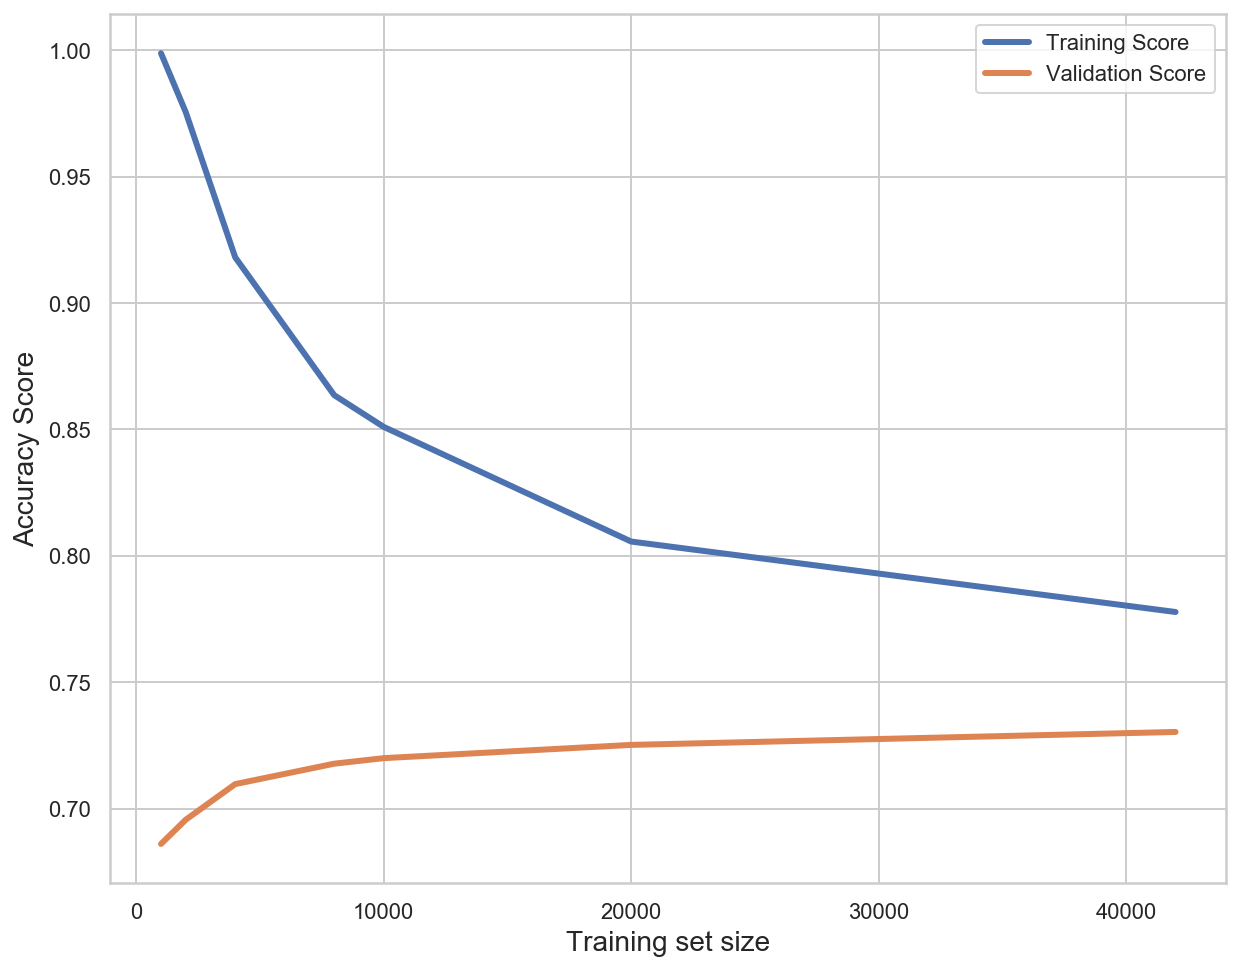

In [170]:
from sklearn.model_selection import learning_curve
train_sizes = [1000, 2000, 4000, 8000, 10000, 20000, 42000]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = GB,
X = X_train_scaled,
y = y_train, train_sizes=train_sizes, cv=5,
scoring ='accuracy', shuffle=True)

sns.set_style('whitegrid')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, label = 'Training Score', lw=3)
plt.plot(train_sizes, validation_scores_mean, label = 'Validation Score', lw=3)
plt.ylabel('Accuracy Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.legend()
plt.savefig("GradientBoosting Learning Curve.png")

In [205]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
# grid search
model = GradientBoostingClassifier(n_estimators=80,
                                   max_features=5,
#                                    max_depth=5,
                                   random_state=42)
max_depth = [5,10]
learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
param_grid = dict(learning_rate=learning_rate,max_depth=max_depth)
# param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
# plt.errorbar(learning_rate, means, yerr=stds)
# plt.title("GradientBoostingClassifier learning_rate vs Log Loss")
# plt.xlabel('learning_rate')
# plt.ylabel('Log Loss')
# plt.savefig('learning_rate.png')

C:\Users\kylie\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best: -0.543238 using {'learning_rate': 0.05, 'max_depth': 5}
-0.691024 (0.000022) with: {'learning_rate': 0.0001, 'max_depth': 5}
-0.690948 (0.000024) with: {'learning_rate': 0.0001, 'max_depth': 10}
-0.673498 (0.000219) with: {'learning_rate': 0.001, 'max_depth': 5}
-0.672834 (0.000241) with: {'learning_rate': 0.001, 'max_depth': 10}
-0.582175 (0.001785) with: {'learning_rate': 0.01, 'max_depth': 5}
-0.580908 (0.001863) with: {'learning_rate': 0.01, 'max_depth': 10}
-0.543238 (0.004263) with: {'learning_rate': 0.05, 'max_depth': 5}
-0.550498 (0.004304) with: {'learning_rate': 0.05, 'max_depth': 10}
-0.543456 (0.004551) with: {'learning_rate': 0.1, 'max_depth': 5}
-0.556743 (0.004767) with: {'learning_rate': 0.1, 'max_depth': 10}
-0.545750 (0.004581) with: {'learning_rate': 0.2, 'max_depth': 5}
-0.578668 (0.004468) with: {'learning_rate': 0.2, 'max_depth': 10}


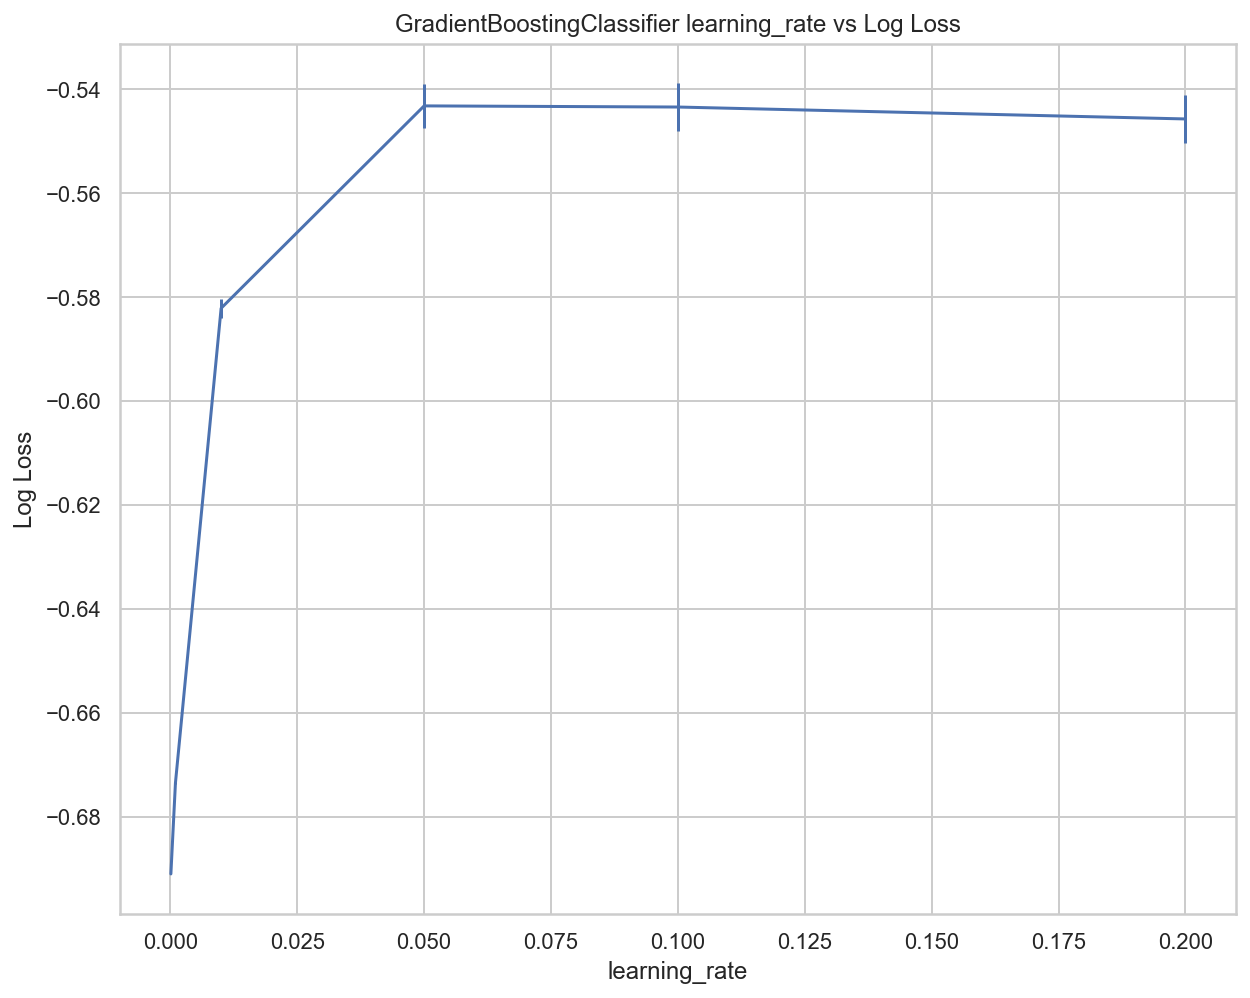

In [190]:
# plot
plt.figure(figsize=(8,5))
plt.errorbar(learning_rate, means, yerr=stds)
plt.title("GradientBoostingClassifier learning_rate vs Log Loss")
plt.xlabel('learning_rate')
plt.ylabel('Log Loss')
plt.savefig('learning_rate.png')

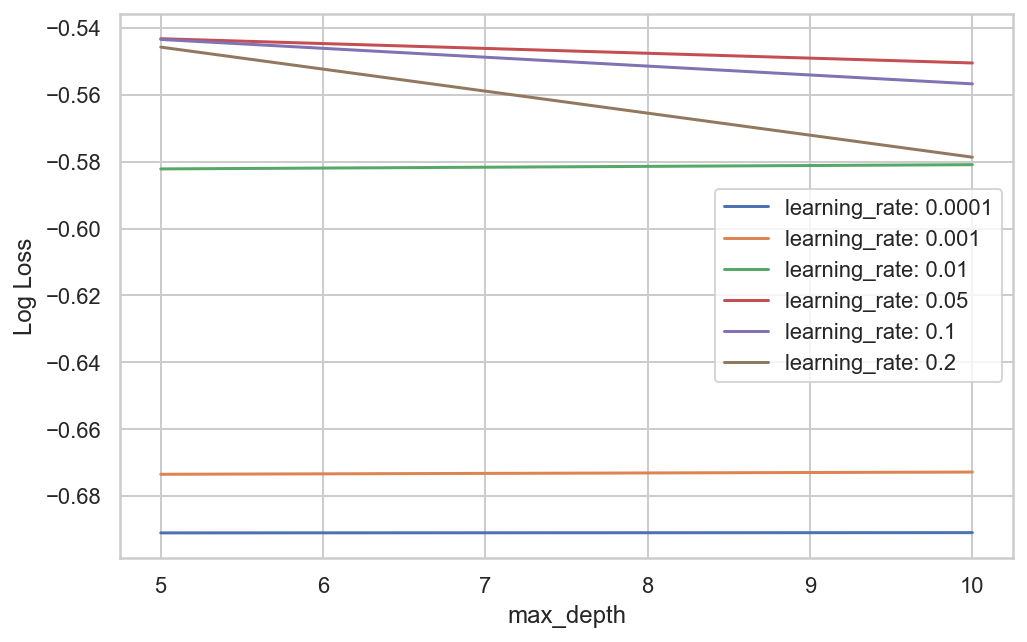

In [207]:
#plot results
plt.figure(figsize=(8,5))
scores = np.array(means).reshape(len(learning_rate), len(max_depth))
for i, value in enumerate(learning_rate):
    plt.plot(max_depth, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth_vs_learning_rate.png')